#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score




To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20)
a=-1 
b=2
y=a*x+b


In [3]:
#Make a dictionary to data and add to dataframe 
datadict = { 'x0 ': 1 , 'x1':x , 'y':y}
data = pd.DataFrame(datadict)
data.head()

,x0,x1,y
0,1,0.000000,2.000000
1,1,0.408163,1.591837
2,1,0.816327,1.183673
3,1,1.224490,0.775510
4,1,1.632653,0.367347


In [4]:
cols = data.shape[1]
x=data.iloc[: , 0:cols-1]
y=data.iloc[: , cols-1:cols]

In [5]:
x.head()


,x0,x1
0,1,0.000000
1,1,0.408163
2,1,0.816327
3,1,1.224490
4,1,1.632653


In [6]:
y.head()

,y
0,2.000000
1,1.591837
2,1.183673
3,0.775510
4,0.367347


In [7]:
#convert x , y data frames to metrices
x=  np.matrix(x.values)

y = np.matrix (y.values)


In [8]:
# n is number of parameters in x 
n = x.shape[1]




In [9]:
print('X.shape = ' , x.shape)
print('y.shape = ' , y.shape)



X.shape =  (50, 2)
y.shape =  (50, 1)


#### Plot your data points. 

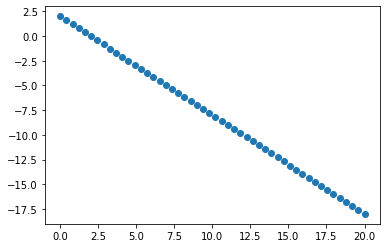

In [10]:
plt.scatter(data.x1,data.y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

In [11]:
# theta.shape

In [12]:
def compute_cost(x,y,theta):

    return (np.power(( (x @ theta) - y ), 2 )  )  / (2*len(x)) 
  
#         J = (error.T @ error)/(2*len(x))



# print('Calculate the Cost fun in  case of values of theta is 0')

# print( compute_cost(x, y, theta))


In [13]:

def ADGRAD_GD(X,Y,LearnRate,epochs,eps): 
    n = X.shape[1]

    costs =  []
    theta_list=[]
    hypothesis = []
    VT = np.zeros((n,1))
    Theta = np.matrix(np.zeros((n,1)))


    for i in range ( epochs ):
        theta_list.append(Theta)
        # prediction 
        pred =  X @ Theta
        hypothesis.append(pred)
        
        # compute erorr
        
        error = pred - Y

        # compute cost function 
        J = (error.T @ error)/(2*len(x))

#         J=compute_cost(X,Y,Theta)
        costs.append( J[0,0] )

        #compute gradient

        gradient = (X.T @ error)/len(X)
        
        VT = VT + np.power(gradient,2)
        #update theta


        Theta = Theta - ((LearnRate * gradient)/((np.sqrt(VT))+ eps))

        if i>0:
            if(np.abs(costs[i-1] - costs[i]) < 0.001):
                break
    
    
    return Theta , theta_list , costs , hypothesis 
        
        
    


In [49]:
alpha=0.3
itera=400
eps =1e-8
Theta , theta_list , cost , hypothesis  = ADGRAD_GD(x,y,alpha,itera,eps)


In [50]:
cost[-1]

0.0771746720448701

In [51]:
print("final Theta : " , Theta)
# print("final Cost : " , cost[-1])
cost[-1]

final Theta :  [[ 1.23149636]
 [-0.9415459 ]]


0.0771746720448701

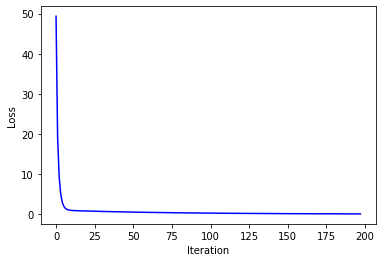

In [52]:
#Plot epochs against Loss
plt.plot(cost, 'b')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [53]:
theta_list=np.array(theta_list)
theta_0 = theta_list[: , 0].reshape(-1,1)
theta_1 = theta_list[: , 1].reshape(-1,1)

Text(0, 0.5, 'Cost')

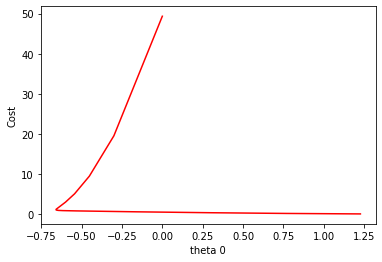

In [54]:

fig,ax = plt.subplots()
ax.plot(theta_0, cost ,'r')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost')

Text(0, 0.5, 'Cost Value')

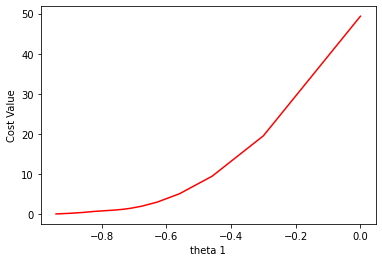

In [55]:


fig,ax = plt.subplots()
ax.plot(theta_1, cost ,'r')

ax.set_xlabel('theta 1')
ax.set_ylabel('Cost Value')

In [56]:
#make prediction 
y_pred=x*Theta

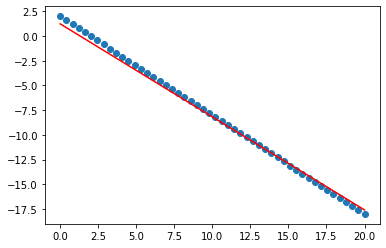

In [57]:

plt.scatter(data.x1,data.y)
plt.plot(data.x1,y_pred,color='r')
plt.show()

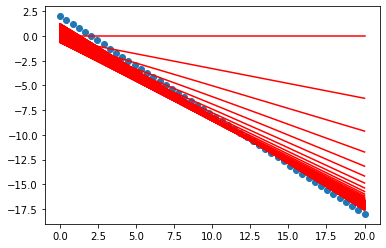

In [58]:


plt.scatter(data.x1,data.y)

for i in theta_list:
  y_pred = x*i
  plt.plot(data.x1,y_pred,color='r')


In [59]:
print(r2_score(y,y_pred))

0.9955511071409427


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [ ]:


def RMSPROP(X,Y,LearnRate,beta,epochs,eps):  
    n = X.shape[1]
    costs =  []
    theta_list=[]
    hypothesis = []
    VT = np.zeros((n,1))
    Theta = np.matrix(np.zeros((n,1)))

    for i in range ( epochs ):
        theta_list.append(Theta)
        # prediction 
        pred =  X @ Theta
        hypothesis.append(pred)
        
        # compute erorr
        
        error = pred - Y

        # compute cost function 
        J = (error.T @ error)/(2*len(x))

#         J=compute_cost(X,Y,Theta)
        costs.append( J[0,0] )

        #compute gradient

        gradient = (X.T @ error)/len(X)
        
        VT = (beta * VT) + (1-beta) * np.power(gradient,2)
        #update theta



        Theta = Theta - ((LearnRate * gradient)/((np.sqrt(VT))+ eps))

        if i>0:
            if(np.abs(costs[i-1] - costs[i]) < 0.0001):
                break
    
    
    return Theta , theta_list , costs , hypothesis 
        
        
    


In [ ]:
eps = 1e-8
LearnRate = 0.1
beta = 0.5
iters = 1000

R_Theta , R_theta_list , R_costs , R_hypothesis =RMSPROP(x,y,LearnRate,beta , iters,eps)

In [ ]:
print(R_Theta)
R_costs[-1]

[[ 1.84042909]
 [-1.04166379]]


0.1962175857549673

In [ ]:
R_theta_list=np.array(R_theta_list)
theta_00= R_theta_list[: , 0].reshape(-1,1)
theta_11 = R_theta_list[: , 1].reshape(-1,1)

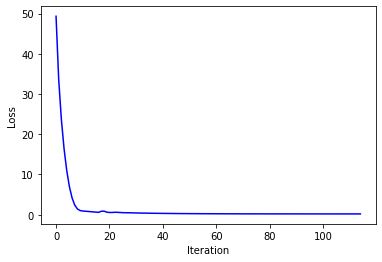

In [ ]:

#Plot epochs against Loss
plt.plot(R_costs, 'b')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
theta_00.shape


(115, 1)

Text(0, 0.5, 'Cost')

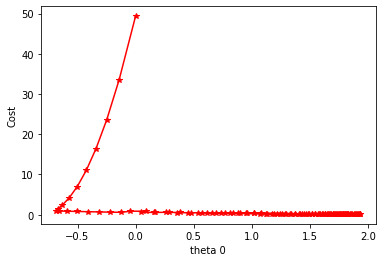

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta_00, R_costs ,'r*-')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost')



Text(0, 0.5, 'Cost')

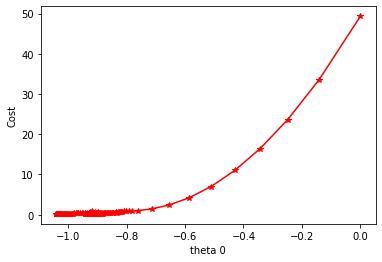

In [ ]:


fig,ax = plt.subplots()
ax.plot(theta_11, R_costs ,'r*-')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost')

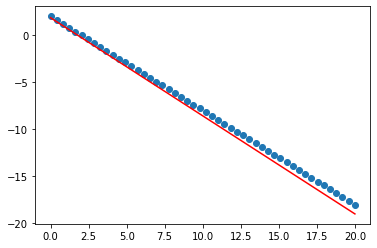

In [ ]:
#make prediction 
y_pred1=x*R_Theta

plt.scatter(data.x1,data.y)
plt.plot(data.x1,y_pred1,color='r')
plt.show()

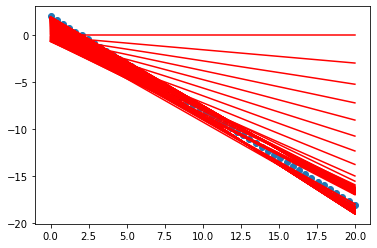

In [ ]:


plt.scatter(data.x1,data.y)

for i in R_theta_list:
  y_pred1 = x*i
  plt.plot(data.x1,y_pred1,color='r')


In [ ]:
print(r2_score(y,y_pred1))

0.9886886332917725


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

In [ ]:


def ADAM(X,Y,LearnRate,B1,B2,epochs,eps):  
    n = X.shape[1]

    costs =  []
    theta_list=[]
    hypothesis = []
    VT = np.zeros((n,1))
    Theta = np.matrix(np.zeros((n,1)))
    mt=np.zeros((n,1))

    for i in range (epochs):
        theta_list.append(Theta)
        # prediction 
        pred =  X @ Theta
        hypothesis.append(pred)
        
        # compute erorr
        
        error = pred - Y

        # compute cost function 
        J = (error.T @ error)/(2*len(x))

#         J=compute_cost(X,Y,Theta)
        costs.append( J[0,0] )

        #compute gradient

        gradient = (X.T @ error)/len(X)
#         bias correction
        
        mt = (B1 * mt) + (1-B1) * gradient
        VT = (B2 * VT) + (1-B2) * np.power(gradient,2)
    
        mt_hat = mt/(1-np.power(B1,i+1))
        vt_hat = VT/(1-np.power(B2,i+1))     
#         mt_hat = mt/(1-(B1))
#         vt_hat = VT/(1-(B2))
        
    
    #Update thetas


        Theta = Theta - ((LearnRate * mt_hat)/((np.sqrt(vt_hat))+ eps))

        if i>0:
            if(np.abs(costs[i-1] - costs[i]) < 0.001):
                break
            elif ( np.linalg.norm(gradient)  < 0.001):
                break
            
                
    
    
    return Theta , theta_list , costs , hypothesis 
        
        
    


In [ ]:
Eps = 1e-9
learnRate = 0.1
B1 = 0.4
B2 = 0.12

epochs = 500


In [ ]:


A_Theta , A_theta_list , A_costs , A_hypothesis  = ADAM(x, y, learnRate, B1, B1,  epochs,Eps)

NameError: ignored

In [ ]:
print(A_Theta)

In [ ]:
len(A_costs)

In [ ]:
A_costs[-1]

In [ ]:
#Plot epochs against Loss
plt.plot(A_costs, 'b')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
A_theta_list=np.array(A_theta_list)
theta0= A_theta_list[: , 0].reshape(-1,1)
theta1 = A_theta_list[: , 1].reshape(-1,1)



In [ ]:
fig,ax = plt.subplots()
ax.plot(theta0, A_costs ,'r')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost')



In [ ]:


fig,ax = plt.subplots()
ax.plot(theta1, A_costs ,'r')

ax.set_xlabel('theta 1')
ax.set_ylabel('Cost')

In [ ]:
#make prediction 
ypred=x*A_Theta
plt.scatter(data.x1,data.y)
plt.plot(data.x1,ypred,color='r')
plt.show()



In [ ]:
plt.scatter(data.x1,data.y)

for i in A_theta_list:
  ypred = x*i
  plt.plot(data.x1,ypred,color='b')


In [ ]:

print(r2_score(y,ypred))

## Congratulations 
![image.png](attachment:image.png)

In [ ]:


def ADAM(X,Y,LearnRate,B1,B2,epochs,eps):  
    n = X.shape[1]

    costs =  []
    theta_list=[]
    hypothesis = []
    VT = np.zeros((n,1))
    Theta = np.matrix(np.zeros((n,1)))
    mt=np.zeros((n,1))

    for i in range (epochs):
        theta_list.append(Theta)
        # prediction 
        pred =  X @ Theta
        hypothesis.append(pred)
        
        # compute erorr
        
        error = pred - Y

        # compute cost function 
        J = (error.T @ error)/(2*len(x))

#         J=compute_cost(X,Y,Theta)
        costs.append( J[0,0] )

        #compute gradient

        gradient = (X.T @ error)/len(X)
#         bias correction
        
        mt = (B1 * mt) + (1-B1) * gradient
        VT = (B2 * VT) + (1-B2) * np.power(gradient,2)
    
        mt_hat = mt/(1-np.power(B1,i+1))
        vt_hat = VT/(1-np.power(B2,i+1))     
#         mt_hat = mt/(1-(B1))
#         vt_hat = VT/(1-(B2))
        
    
    #Update thetas


        Theta = Theta - ((LearnRate * mt_hat)/((np.sqrt(vt_hat))+ eps))

        if i>0:
            if(np.abs(costs[i-1] - costs[i]) < 0.001):
                break
                
    
    
    return Theta , theta_list , costs , hypothesis 
        
        
    
